#Archisha Sinha

##Domain: Computer Vision
##Topic: Edge Detection

#Experiment 1:  To highlight edges of the given image and draw histogram of the orientation

In [1]:
# Importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import data

In [2]:
image =  data.coins()

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)
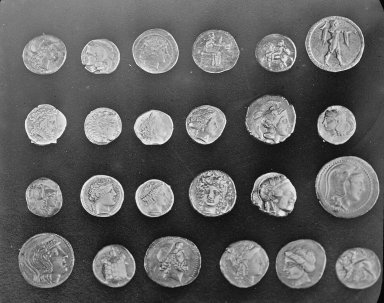

In [3]:
image

In [4]:
image.shape

(303, 384)

In [5]:
[row,col]= image.shape

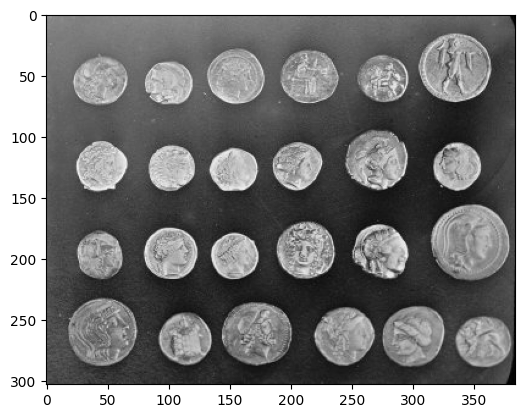

In [6]:
plt.imshow(image, cmap='gray')

In [7]:
# Edges means there is change or varientation in pixel intensities
# How do we do that? -> We will draw derivative
# Small diff in pixels give weak edges and Large diff in pixels give strong edges
# Sobel filter is applied
# F= float since we want more decimal values

# K-size=3

diff_x= cv2.Sobel(image, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=5)
diff_y= cv2.Sobel(image, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=5)

In [8]:
# When we print the image the negative value will come as 0 pixel that is Black, thus we take the Absolute value
abs_diff_x= cv2.convertScaleAbs(diff_x)
abs_diff_y= cv2.convertScaleAbs(diff_y)

print(abs_diff_x)
print(abs_diff_y)

[[  0 255 255 ... 255 255   0]
 [  0 255 255 ... 255 255   0]
 [  0 255 255 ... 255 255   0]
 ...
 [  0 255 255 ... 111  32   0]
 [  0 255 255 ...  14  38   0]
 [  0 255 255 ...  40  76   0]]
[[  0   0   0 ...   0   0   0]
 [255 255 255 ... 255 107  50]
 [255 255  36 ... 255 255 160]
 ...
 [ 76  54  12 ...  23  52  84]
 [146  71  72 ...  14  78 116]
 [  0   0   0 ...   0   0   0]]


In [9]:
print(np.max(diff_x), np.min(diff_x))
print(np.max(diff_y), np.min(diff_y))
print(np.max(abs_diff_x), np.min(abs_diff_x))
print(np.max(abs_diff_y), np.min(abs_diff_y))

8675.0 -8532.0
9367.0 -9379.0
255 0
255 0


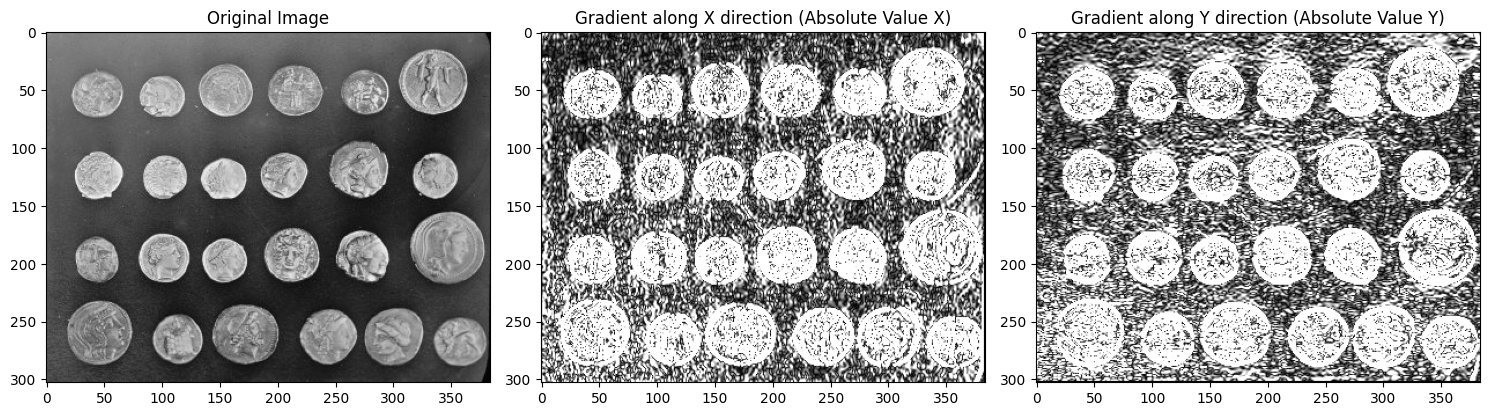

In [10]:
plt.figure(figsize=(15,15))

#Original Image
plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('on')

#Gradient along X direction (Absolute Value X)
plt.subplot(1,3,2)
plt.imshow(abs_diff_x, cmap='gray')
plt.title('Gradient along X direction (Absolute Value X)')
plt.axis('on')

#Gradient along Y direction (Absolute Value Y)
plt.subplot(1,3,3)
plt.imshow(abs_diff_y, cmap='gray')
plt.title('Gradient along Y direction (Absolute Value Y)')
plt.axis('on')

plt.tight_layout()
plt.show()
# Gradient along X gives Vertical Edges
# Gradient along Y gives Horizontal Edges

In [11]:
# At each instance we will calculate derivative
magnitude = np.sqrt(np.square(diff_x) + np.square(diff_y))

# Calculating Angle
# Converting radians into degree
# (np.arctan2(diff_y, diff_x)) gives answer in Radians
# thus multiplying by * 180 / np.pi to convert it in degrees
# We are taking mod value 0-180 degree thus we use % 180
angle = ((np.arctan2(diff_y, diff_x)) * 180 / np.pi) % 180


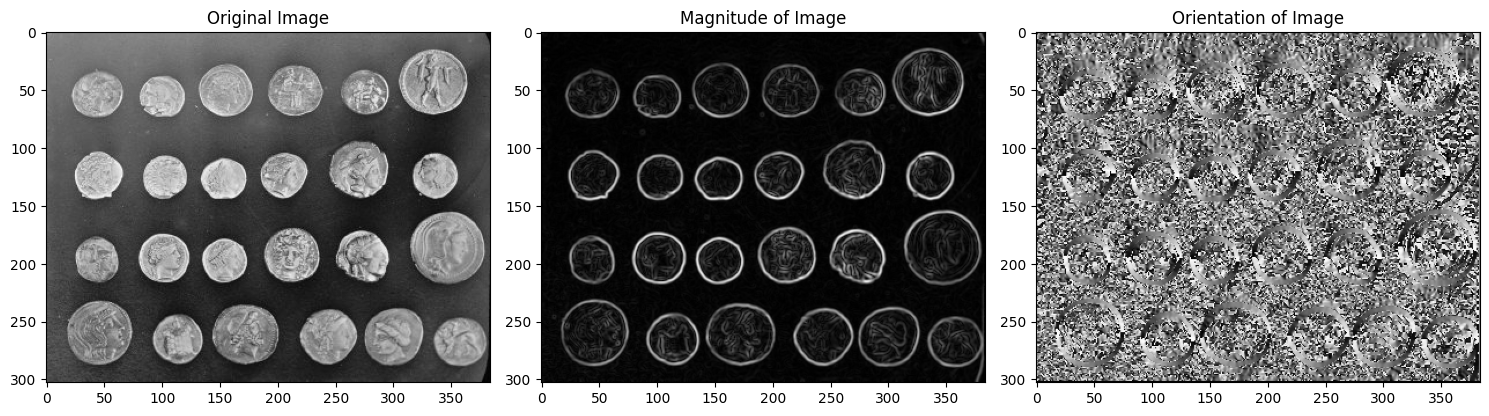

In [12]:
plt.figure(figsize=(15,15))

#Original Image
plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('on')

# Magnitude of Image
plt.subplot(1,3,2)
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude of Image')
plt.axis('on')

# Orientation of Image
plt.subplot(1,3,3)
plt.imshow(angle, cmap='gray')
plt.title('Orientation of Image')
plt.axis('on')

plt.tight_layout()
plt.show()

In [13]:
# if there is an edge point, then the edges pixel loc the magnitude will be large
# if at a perticular point there is an edge pixel then only we will take its orientation as to us only Edges are imgortant
# thusonly Magnitude of the image is imp to us than the orientation

# Histogram will tell us what is the angle
# On X- the angle and on Y- the frequency of the pixel

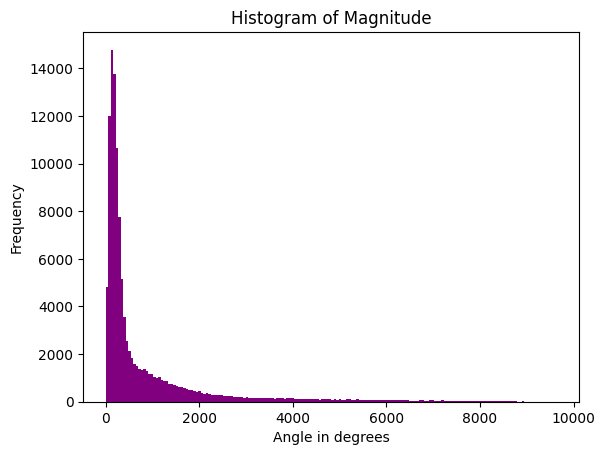

In [14]:
# To determine a histogram with X-> Angle , Y-> Frequency

mag_1D= np.reshape(magnitude, (row*col,1))        #changing magnitude to 1D
plt.hist(mag_1D, bins=180, color='purple')
plt.title('Histogram of Magnitude')
plt.xlabel('Angle in degrees')
plt.ylabel('Frequency')
plt.show()

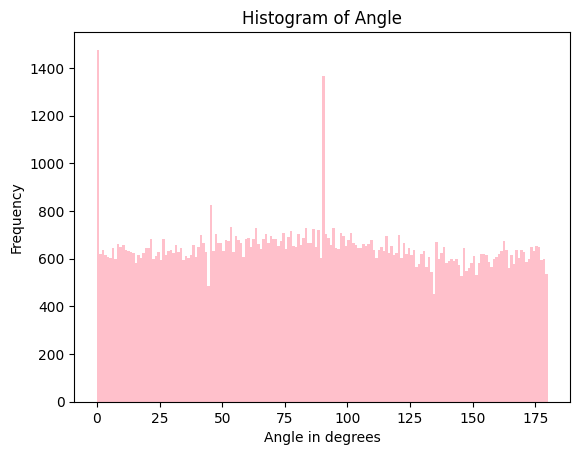

In [15]:
angle_1D= np.reshape(angle, (row*col,1))        #changing angle to 1D
plt.hist(angle_1D, bins=180, color='pink')
plt.title('Histogram of Angle')
plt.xlabel('Angle in degrees')
plt.ylabel('Frequency')
plt.show()

[[  0. 255. 255. ... 255. 255.   0.]
 [255. 255. 255. ... 255. 255.   0.]
 [255. 255. 255. ... 255. 255.   0.]
 ...
 [  0. 255. 255. ...   0.   0.   0.]
 [  0. 255. 255. ...   0.   0.   0.]
 [  0. 255. 255. ...   0.   0.   0.]]


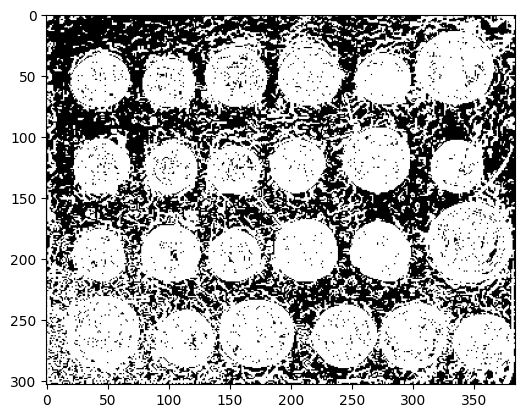

In [16]:
mag_th = magnitude
th=200
for r in range (row):
  for c in range (col):
    if magnitude[r,c]>th:
      mag_th[r,c]=255
    else:
      mag_th[r,c]=0

print(mag_th)
plt.imshow(mag_th, cmap='gray')
plt.show()

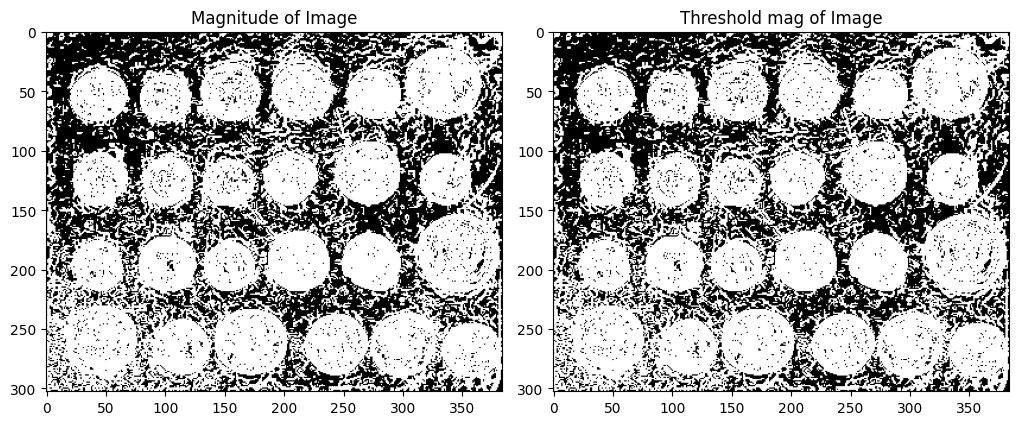

In [17]:
plt.figure(figsize=(15,15))

# Magnitude of Image
plt.subplot(1,3,2)
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude of Image')
plt.axis('on')

# Threshold magnitude of Image
plt.subplot(1,3,3)
plt.imshow(mag_th, cmap='gray')
plt.title('Threshold mag of Image')
plt.axis('on')

plt.tight_layout()
plt.show()

## Conclusion:
- Sobel filter is used to highlight edges in all directions.

- Histogram of Orienation (angle) shows that maximum pixels which are lying on edges have angles 0, approx 45, approx 90, approx 135.

- Thus  this shows that the given image have strong edges at these angles which are measured with respect to Vertical Axis.

- When ksize is changed , final appearance of edges disappear as filter size is large, thus edges are not occupying the egdes, thus 3x3 filter is the smallest.

- Thus larger is th filter, it cannot detect the fine details. Smaller is the filter, it can detect small details accurately.

- If sobel filter size is increased from 3x3 to 5x5 or larger, the fine details of edges disappear, which leads tobluring of the final edgs of the given images.
